<a href="https://colab.research.google.com/github/geunkim/Artificial-Intelligence/blob/master/Code/Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entropy(엔트로피), KL Divergence, Cross-Entropy(크로스 엔트로피) 이해하기** 

In [0]:
import numpy as np

In [0]:
np.log2(2)

1.0

1. 박스에 검정색 공과 흰색 공에 50개 50개 있을 때 엔트로피는?


$-(0.5{\cdot}log_2(0.5) + 0.5{\cdot}log_2(0.5))$




In [0]:
-(0.5 * np.log2(0.5) + 0.5 * np.log2(0.5))

1.0

2 박스에 흰색 공이 99개 검정색 공이 1개이 있을 때 엔트로피는? 

In [0]:
-(0.99*np.log2(0.99) + 0.01 * np.log2(0.01))

0.08079313589591118

3. 박스에 100개의 공이 모두 다른 색일 때 엔트로피는? 

In [0]:
sum = 0
for i in range(100):
  sum += -(1/100)*np.log2(1/100)
sum

6.6438561897747395

4. 박스에 256개의 공이 모두 다른 색일 때 엔트로피는?

In [0]:
sum = 0
for i in range(256):
  sum += -(1/256)*np.log2(1/256)
sum

8.0

5. 박스에 공이 512개 있고 흰색 공이 1개 검정 색 공이 511개 있을 때의 엔트로피는?이탤릭체 텍스트

In [0]:
(1/512)*-np.log2(1/512) + (511/512)*-np.log2(511/512)

0.020393135236084953

**엔트로피는 불확실성의 척도로 정보의 유사성이 적을수록 엔트로피는 증가한다.**

* $log_2(x)$ 함수 그래프 그리기

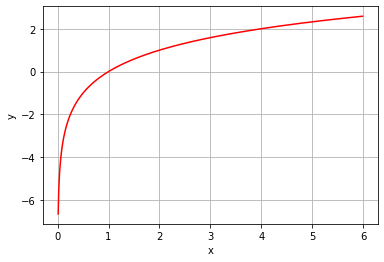

In [0]:
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(0.01, 6, 0.01)
y = np.log2(x)
plt.plot(x, y, 'r')
plt.grid(True)
# x, y 축에 이름 넣기
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## **Kullback-Leibler (KL) divergence** 

<referece: https://towardsdatascience.com/kl-divergence-python-example-b87069e4b810>

KL divergence는 두 확률분포(probability distribution)간의 거리를 정량화하는 도구

$p$ 와 $q$가 이산랜덤변수(discrete random variable)의 확률분포일 때 
K-L divergence 는 

$KL(p||q) = -\sum p_i(x)[log(q_i(x))-log(p_i(x)]$

In [0]:
import tensorflow as tf
m = tf.keras.metrics.KLDivergence()
m.update_state([.8, .1, .1],[.6, .2, .2])
print('Final result:', m.result().numpy())

Final result: 0.09151618


##### **1. 필요한 라이브러러 임포트(import)** 

In [0]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import tensorflow as tf
#import seaborn as sns
#sns.set()

#### **2. KL divergence 함수 구현** 

In [0]:
def kl_divergence(p, q):
  return np.sum(np.where(p != 0, p*np.log(p/q), 0))

#### **3. 두 확률분포 간의 KL divergence 구하기** 
  + $p(x)$: 평균이 0이고 표준편차가 2인 정규분포
  + $q(x)$: 평균이 2이고 표준편차가 2인 정규분포


##### **(1) 직접 만든 함수를 사용한 경우**

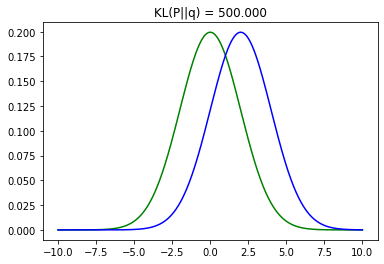

In [0]:
x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 2)

plt.title('KL(P||q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p, c='green')
plt.plot(x, q, c='blue')

##### **(2) 케라스의 metrics.KLDivergence() 함수를 사용한 경우**

In [0]:
m = tf.keras.metrics.KLDivergence()
m.update_state(p, q)
print('Final result:', m.result().numpy())

Final result: 499.99426


#### **4. 다른 확률분포와의  KL-divergence 구하기** 
  * $q(x)$: 평균이 5이고 표준편차가 4인 정규분포  

##### **(1) 직접 만든 함수를 사용한 경우**

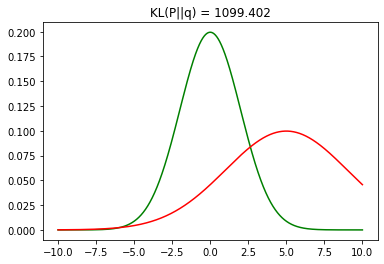

In [0]:
q = norm.pdf(x, 5, 4)

plt.title('KL(P||q) = %1.3f' %kl_divergence(p, q))
plt.plot(x, p, c='green')
plt.plot(x, q, c='red')

##### **(2) 케라스의 metrics.KLDivergence() 함수를 사용한 경우**


In [0]:
m = tf.keras.metrics.KLDivergence()
m.update_state(p, q)
print('Final result:', m.result().numpy())

Final result: 1099.4021


#### **4. $q(x)$ 가 $p(x)$ 와 같은 경우의 KL-Divergence 구하기**

##### **(1) 직접 만든 함수를 사용한 경우**

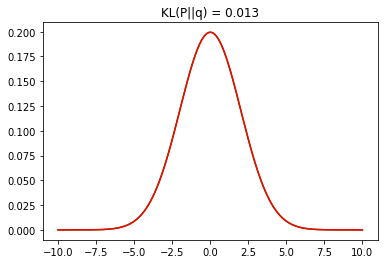

In [0]:
q = norm.pdf(x, 0.01, 2)

plt.title('KL(P||q) = %1.3f' %kl_divergence(p, q))
plt.plot(x, p, c='green')
plt.plot(x, q, c='red')

##### **(2) 케라스의 metrics.KLDivergence() 함수를 사용한 경우**

In [0]:
m = tf.keras.metrics.KLDivergence()
m.update_state(p, q)
print('Final result:', m.result().numpy())

Final result: 0.07087753


#### **5.  KL Divergence 최소화하기 (for future work)**

gradient descent(경사 하강법)을 사용하여 두 개의 확률분포 간의 KL Divergence를 최소화 

* $p(x)$: 평균이 0이고 분산이 표준편차가 2인 정규분포
* $q(x)$: 랜덤 평균과 표준편차의 정규분포 

In [0]:
x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2).reshape(-1,1)
np.random.seed(2)
random_mean = np.random.randint(10, size=1)
random_sigma = np.random.randint(10, size=1)
q = norm.pdf(x, random_mean, random_sigma).reshape(-1, 1)

plt.plot(x, p, c='green')
plt.plot(x, q, c='red')

###### (1) 학습을 위한 하이퍼파라미터 설정 (반복횟수, 학습율)
  * learning rate(학습율): 0.001
  * epochs(반복횟수): 100

## **cross entropy (크로스 엔트로피)**

예측 모델에서 실제분포인 $p$를 모르고 모델링하여 $p$ 분포를 예측하고자 한다. 예측 모델링을 통해 구한 분포를 $q$ 라 하자. 
실제 분포인 $p$를 예측하는 $q$ 분포를 만들었을 때 cross-entropy는 다음과 같이 정의된다. 

$Hq(p)=-\sum_{x=1}^Np(x)log(q(x))$

훈련 데이터를 사용한 예측 모델에서 cross-entropy는 실제 분포와 예측 분포와의 차이(dissimilarity)를 계산하는데 사용할 수 있다. 

```
cross entropy > entropy
``` 

예를 들어 박스에 0.8/0.1/0.1의 비율로 검정/흰색/회색 공이 들어있다. 이것의 예측을 0.2/0.2/0.6 비율이라고 예측을 하였다. 이때 엔트로피와 크로스 엔트로피는 다음과 같다. 

In [0]:
# 엔트로피 (Origin)
e = -(0.8 * np.log(0.8) + 0.1 * np.log(0.1) + 0.1 * np.log(0.1))
print('엔트로피: {}'.format(e))

엔트로피: 0.639031859650177


In [0]:
# 크로스 엔트로피(0.2/0.2/0.6)
e = -(0.8 * np.log(0.2) + 0.1 * np.log(0.2) + 0.1 * np.log(0.6))
print('크로스 엔트로피(1): {}'.format(e))

크로스 엔트로피: 1.4995766835672895


In [0]:
# 크로스 엔트로피(0.6/0.15/0.25)
e = -(0.8 * np.log(0.6) + 0.1 * np.log(0.15) + 0.1 * np.log(0.25))
print('크로스 엔트로피(2): {}'.format(e))

크로스 엔트로피(1): 0.7370019336133699


In [0]:
# 크로스 엔트로피(0.6/0.2/0.2)
e = -(0.8 * np.log(0.6) + 0.1 * np.log(0.2) + 0.1 * np.log(0.2))
print('크로스 엔트로피(3): {}'.format(e))

크로스 엔트로피(3): 0.7305480814996127


In [0]:
# 크로스 엔트로피(0.7/0.15/0.15)
e = -(0.8 * np.log(0.7) + 0.1 * np.log(0.15) + 0.1 * np.log(0.15))
print('크로스 엔트로피(4): {}'.format(e))

크로스 엔트로피(4): 0.6647639521281622


In [0]:
# 크로스 엔트로피(0.79/0.105/0.105)
e = -(0.8 * np.log(0.79) + 0.1 * np.log(0.105) + 0.1 * np.log(0.105))
print('크로스 엔트로피(5): {}'.format(e))

크로스 엔트로피(5): 0.6393368525817786
